# training models on 6.dataset

In [125]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict,cross_validate

from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import RadiusNeighborsClassifier, KNeighborsClassifier
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import roc_curve,make_scorer,average_precision_score, matthews_corrcoef,precision_recall_curve,classification_report
from sklearn.utils import compute_sample_weight
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, roc_auc_score,confusion_matrix

define a score function

In [42]:
def score(y_true, y_pred, y_pred_prob=None):
    accuracy = accuracy_score(y_true, y_pred)
    print("Accuracy:", accuracy)

    precision = precision_score(y_true, y_pred)
    print("Precision:", precision)

    recall = recall_score(y_true, y_pred)
    print("Recall:", recall)

    f1 = f1_score(y_true, y_pred)
    print("F1-score:", f1)

    balanced_accuracy = balanced_accuracy_score(y_true, y_pred)
    print("Balanced Accuracy:", balanced_accuracy)

    if y_pred_prob is not None:
        auc_roc = roc_auc_score(y_true, y_pred_prob)
        print("AUC-ROC:", auc_roc)

    if y_pred_prob is not None:
        auc_pr = average_precision_score(y_true, y_pred_prob)
        print("AUC-PR:", auc_pr)

    # Matthews correlation coefficient
    mcc = matthews_corrcoef(y_true, y_pred)
    print("MCC:", mcc)

    conf_matrix = confusion_matrix(y_true, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    report = classification_report(y_true, y_pred, digits=3)
    print("\nClassification Report:")
    print(report)

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, mean_squared_error, r2_score

def cros_val_score(classifier, X, y):
    scoring_metrics = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score),
        'roc_auc': make_scorer(roc_auc_score)
    }

    scores = {}

    for metric, scorer in scoring_metrics.items():
        # Perform cross-validation
        scores[metric] = cross_val_score(classifier, X, y, cv=5, scoring=scorer)

    print(scores)

In [4]:
def precision_recall(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend(loc="upper right")
    plt.show()

# load the data and prepare it for training

In [5]:
df = pd.read_csv('datasets/dataset5/dataset6.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [6]:
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'])

label_encoder = LabelEncoder()
for i in ["gender", "hypertension", "heart_disease", "ever_married", "Residence_type"]:
    df[i] = label_encoder.fit_transform(df[i])
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,False,True,False,False,False,True,False,False
1,1,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,False,False,True,False
2,0,49.0,0,0,1,1,171.23,34.4,1,False,True,False,False,False,False,False,True
3,0,79.0,1,0,1,0,174.12,24.0,1,False,False,True,False,False,False,True,False
4,1,81.0,0,0,1,1,186.21,29.0,1,False,True,False,False,False,True,False,False


In [7]:
numerical_features = df[["age", "avg_glucose_level", "bmi"]]
scaler = StandardScaler()
scaler.fit(numerical_features)
numerical_features = scaler.transform(numerical_features)
df.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67.0,0,1,1,1,228.69,36.6,1,False,True,False,False,False,True,False,False
1,1,80.0,0,1,1,0,105.92,32.5,1,False,True,False,False,False,False,True,False
2,0,49.0,0,0,1,1,171.23,34.4,1,False,True,False,False,False,False,False,True
3,0,79.0,1,0,1,0,174.12,24.0,1,False,False,True,False,False,False,True,False
4,1,81.0,0,0,1,1,186.21,29.0,1,False,True,False,False,False,True,False,False


In [8]:
X = df.drop("stroke", axis=1)
y = df["stroke"]
# Split train data into train and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

# Training the models

## SGDClassifier

In [9]:
sgd_clf = SGDClassifier(class_weight="balanced",random_state=42)

In [10]:
param_grid = {
    'loss': [ 'hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.001, 0.01,0.1,0.5],
    'max_iter': [100, 200, 400],
}

scoring = {
    'f1': make_scorer(f1_score),
    'roc_auc': make_scorer(roc_auc_score)
}

# Create the GridSearchCV instance with refit='f1'
grid_search = GridSearchCV(estimator=sgd_clf, param_grid=param_grid, cv=5, scoring=scoring, refit='f1',n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model with the optimal parameters
best_sgd_clf = grid_search.best_estimator_
y_test_pred = best_sgd_clf.predict(X_test)

# Calculate the F1 score and ROC AUC score for the best model
f1_score_best_model = f1_score(y_test, y_test_pred)
roc_auc_score_best_model = roc_auc_score(y_test, y_test_pred)
print("F1 Score of the Best Model:", f1_score_best_model)
print("ROC AUC Score of the Best Model:", roc_auc_score_best_model)


Best Parameters: {'alpha': 0.1, 'loss': 'squared_hinge', 'max_iter': 200, 'penalty': 'elasticnet'}
F1 Score of the Best Model: 0.26282051282051283
ROC AUC Score of the Best Model: 0.7645713051333413


In [11]:
y_predSGD = best_sgd_clf.predict(X_train)
y_scoresSGD = cross_val_predict(best_sgd_clf, X_train, y_train, cv=3,method="decision_function")
precisionsSGD, recallsSGD, thresholdsSGD = precision_recall_curve(y_train,y_scoresSGD)
fprSGD, tprSGD, _ = roc_curve(y_train, y_scoresSGD)

In [12]:
score(y_train,y_predSGD,y_scoresSGD)

Accuracy: 0.7688253012048193
Precision: 0.14327772325809618
Recall: 0.7525773195876289
F1-score: 0.2407254740313273
Balanced Accuracy: 0.7611171558360308
AUC-ROC: 0.7424992519652912
AUC-PR: 0.12491658542030812
MCC: 0.2576240666614314
Confusion Matrix:
[[2917  873]
 [  48  146]]

Classification Report:
              precision    recall  f1-score   support

           0      0.984     0.770     0.864      3790
           1      0.143     0.753     0.241       194

    accuracy                          0.769      3984
   macro avg      0.564     0.761     0.552      3984
weighted avg      0.943     0.769     0.833      3984



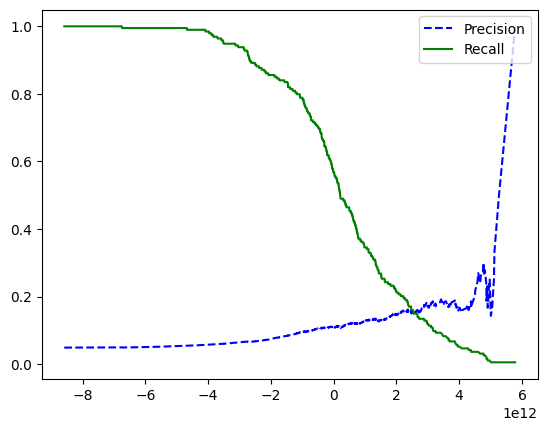

In [13]:
precision_recall(precisionsSGD, recallsSGD, thresholdsSGD)

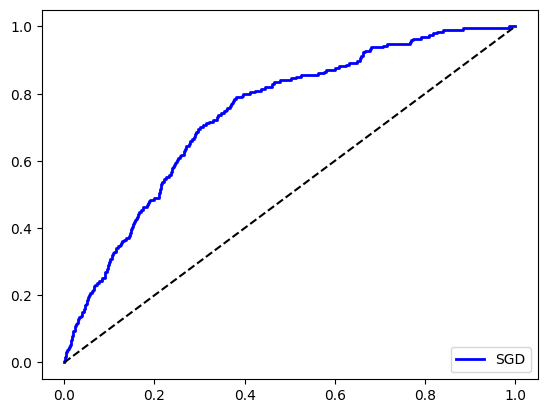

SGD: 0.7424992519652912


In [14]:
plt.plot(fprSGD, tprSGD, 'b',linewidth=2,label="SGD")
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], 'k--')
plt.show()
print(f'SGD: {roc_auc_score(y_train, y_scoresSGD)}')

## RandomForestClassifier

In [15]:
forest_clf = RandomForestClassifier(class_weight="balanced",random_state=42)

In [16]:
param_grid = {
    'n_estimators': [90,100,110,120],     # Number of trees in the forest
    'max_depth': [9,10,11],           # Maximum depth of the trees
    'min_samples_split': [9,10,11],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2],      # Minimum number of samples required to be at a leaf node
}
f1_scorer = make_scorer(f1_score)

grid_search = GridSearchCV(estimator=forest_clf, param_grid=param_grid, cv=5, scoring=f1_scorer,refit=True,n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train)

# Get the best parameters found during the grid search
best_params = grid_search.best_params_

print("Best Parameters:", best_params)
best_forest_clf = grid_search.best_estimator_

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 110}


In [17]:
y_pred_forest = best_forest_clf.predict(X_train)
y_scores_forest = best_forest_clf.predict_proba(X_train)[:, 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train,y_scores_forest)
fpr_forest, tpr_forest, __ = roc_curve(y_train, y_scores_forest)

In [18]:
score(y_train,y_pred_forest,y_scores_forest)

Accuracy: 0.9520582329317269
Precision: 0.5041551246537396
Recall: 0.9381443298969072
F1-score: 0.6558558558558559
Balanced Accuracy: 0.9454573892228599
AUC-ROC: 0.9893670266300357
AUC-PR: 0.8537494045579176
MCC: 0.6679883142631033
Confusion Matrix:
[[3611  179]
 [  12  182]]

Classification Report:
              precision    recall  f1-score   support

           0      0.997     0.953     0.974      3790
           1      0.504     0.938     0.656       194

    accuracy                          0.952      3984
   macro avg      0.750     0.945     0.815      3984
weighted avg      0.973     0.952     0.959      3984



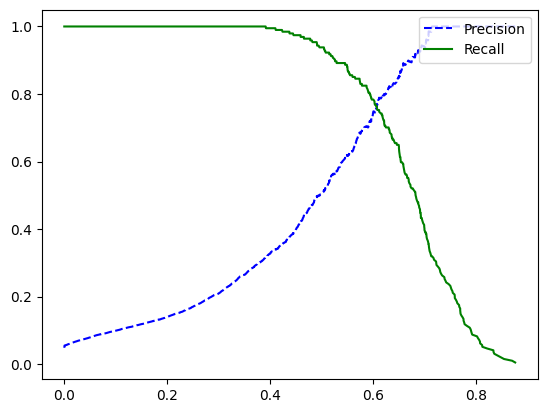

In [19]:
precision_recall(precisions_forest, recalls_forest, thresholds_forest)

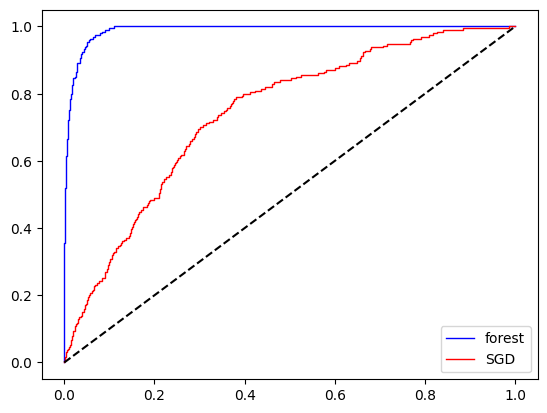

forest: 0.9893670266300357
SGD: 0.7424992519652912


In [20]:
plt.plot(fpr_forest, tpr_forest, 'b',linewidth=1,label="forest")
plt.plot(fprSGD, tprSGD, 'r',linewidth=1,label="SGD")
plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.show()
print(f'forest: {roc_auc_score(y_train, y_scores_forest)}')
print(f'SGD: {roc_auc_score(y_train, y_scoresSGD)}')

## SVC Classifier

In [21]:
svc_clf = SVC(kernel='linear', C=1, class_weight='balanced', probability=True, random_state=42)

In [22]:
param_grid = {
    'C': [0.5,1,1.2],                # Regularization parameter
}

f1_scorer = make_scorer(f1_score)

grid_search = GridSearchCV(estimator=svc_clf, param_grid=param_grid, cv=5, scoring=f1_scorer, refit=True,n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


print("Best Parameters:", best_params)
print("Best F1 Score:", grid_search.best_score_)
best_svc_clf = grid_search.best_estimator_


Best Parameters: {'C': 1}
Best F1 Score: 0.2238205007961825


I  tried rbf kernel and the linear did better

In [23]:
y_pred_SVC = best_svc_clf.predict(X_train)
y_scores_SVC = best_svc_clf.predict_proba(X_train)[:, 1]
precisions_SVC, recalls_SVC, thresholds_SVC = precision_recall_curve(y_train,y_scores_SVC)
fpr_SVC, tpr_SVC, __ = roc_curve(y_train, y_scores_SVC)

In [24]:
score(y_train,y_pred_SVC,y_scores_SVC)

Accuracy: 0.7196285140562249
Precision: 0.1310951239008793
Recall: 0.845360824742268
F1-score: 0.22698961937716264
Balanced Accuracy: 0.7792767184397356
AUC-ROC: 0.8429861545575714
AUC-PR: 0.18344553102511674
MCC: 0.25902204491712266
Confusion Matrix:
[[2703 1087]
 [  30  164]]

Classification Report:
              precision    recall  f1-score   support

           0      0.989     0.713     0.829      3790
           1      0.131     0.845     0.227       194

    accuracy                          0.720      3984
   macro avg      0.560     0.779     0.528      3984
weighted avg      0.947     0.720     0.799      3984



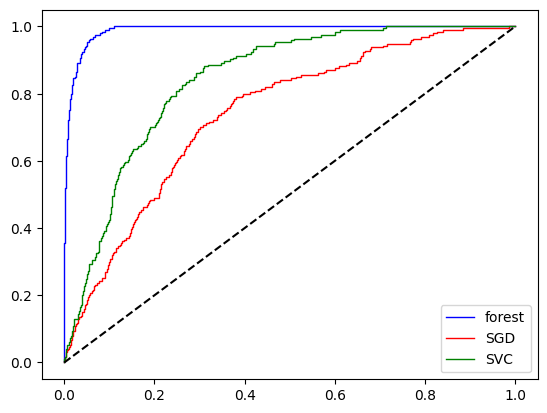

SVC: 0.8429861545575714
forest: 0.9893670266300357
SGD: 0.7424992519652912


In [25]:
plt.plot(fpr_forest, tpr_forest, 'b',linewidth=1,label="forest")
plt.plot(fprSGD, tprSGD, 'r',linewidth=1,label="SGD")
plt.plot(fpr_SVC, tpr_SVC, 'g',linewidth=1,label="SVC")

plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.show()
print(f'SVC: {roc_auc_score(y_train, y_scores_SVC)}')
print(f'forest: {roc_auc_score(y_train, y_scores_forest)}')
print(f'SGD: {roc_auc_score(y_train, y_scoresSGD)}')

## Logistic Regression classifier

In [26]:
logreg_model = LogisticRegression(class_weight='balanced', max_iter= 500,random_state=42)

In [36]:
param_grid = {
    'C': [2.5, 1],                  # Inverse of regularization strength
    'penalty': ['l1'],            # Regularization penalty ('l1' or 'l2')
    'solver': ['liblinear'],    # Solver for optimization
    'max_iter': [300,200],
}

f1_scorer = make_scorer(f1_score)
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=3, scoring=f1_scorer, n_jobs=-1,refit=True)
grid_search.fit(X_train, y_train)

# Get the best parameters found during the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_logreg_model = grid_search.best_estimator_

cv_results = grid_search.cv_results_
print("All Scores for Tried Combinations:")
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"Parameters: {params}, Mean F1 Score: {mean_score}")


Best Parameters: {'C': 2.5, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}
All Scores for Tried Combinations:
Parameters: {'C': 2.5, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}, Mean F1 Score: 0.2305101365354261
Parameters: {'C': 2.5, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}, Mean F1 Score: 0.2305101365354261
Parameters: {'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}, Mean F1 Score: 0.22947162877569463
Parameters: {'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}, Mean F1 Score: 0.22947162877569463


In [40]:
results = grid_search.cv_results_
top_5_indices = np.argsort(results['mean_test_score'])[-5:]

print("Top 5 Combinations:")
for index in top_5_indices:
    params = results['params'][index]
    mean_score = results['mean_test_score'][index]
    print(f"Hyperparameters: {params}, Mean Test Score: {mean_score:.5f}")

Top 5 Combinations:
Hyperparameters: {'C': 1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}, Mean Test Score: 0.22947
Hyperparameters: {'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}, Mean Test Score: 0.22947
Hyperparameters: {'C': 2.5, 'max_iter': 300, 'penalty': 'l1', 'solver': 'liblinear'}, Mean Test Score: 0.23051
Hyperparameters: {'C': 2.5, 'max_iter': 200, 'penalty': 'l1', 'solver': 'liblinear'}, Mean Test Score: 0.23051


In [41]:
y_pred_logreg = best_logreg_model.predict(X_train)
y_scores_logreg = best_logreg_model.predict_proba(X_train)[:, 1]
precisions_logreg, recalls_logreg, thresholds_logreg = precision_recall_curve(y_train,y_scores_logreg)
fpr_logreg, tpr_logreg, __ = roc_curve(y_train, y_scores_logreg)

In [43]:
score(y_train,y_pred_logreg,y_scores_logreg)

Accuracy: 0.7306726907630522
Precision: 0.13466334164588528
Recall: 0.8350515463917526
F1-score: 0.23192555476020044
Balanced Accuracy: 0.7801906808475914
AUC-ROC: 0.8437777112858037
AUC-PR: 0.18619858838061717
MCC: 0.262706515501324
Confusion Matrix:
[[2749 1041]
 [  32  162]]

Classification Report:
              precision    recall  f1-score   support

           0      0.988     0.725     0.837      3790
           1      0.135     0.835     0.232       194

    accuracy                          0.731      3984
   macro avg      0.562     0.780     0.534      3984
weighted avg      0.947     0.731     0.807      3984



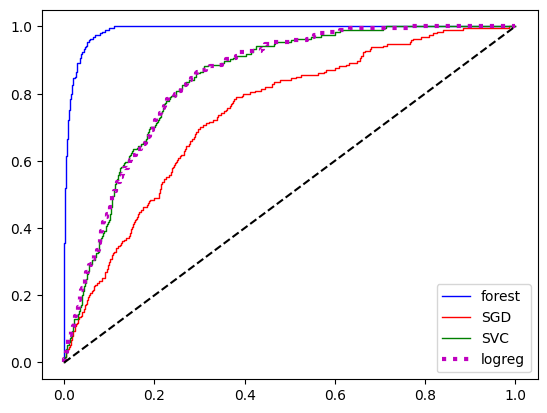

SVC: 0.8429861545575714
forest: 0.9893670266300357
SGD: 0.7424992519652912
logreg: 0.8437777112858037


In [44]:
plt.plot(fpr_forest, tpr_forest, 'b',linewidth=1,label="forest")
plt.plot(fprSGD, tprSGD, 'r',linewidth=1,label="SGD")
plt.plot(fpr_SVC, tpr_SVC, 'g',linewidth=1,label="SVC")
plt.plot(fpr_logreg, tpr_logreg, 'm:',linewidth=3,label="logreg")

plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.show()
print(f'SVC: {roc_auc_score(y_train, y_scores_SVC)}')
print(f'forest: {roc_auc_score(y_train, y_scores_forest)}')
print(f'SGD: {roc_auc_score(y_train, y_scoresSGD)}')
print(f'logreg: {roc_auc_score(y_train, y_scores_logreg)}')

## Gradient Boosting

we need to make class_weight because Gradient Boosting doest have

In [45]:
pd.Series(y_train).value_counts()

stroke
0    3790
1     194
Name: count, dtype: int64

CALCULATING THE CLASS WEIGHT SO THE DATA IS BALANCED

In [46]:
unique_classes = np.unique(y_train)
class_counts = np.bincount(y_train)
# Calculate the frequency of each class in the training data
class_frequencies = {class_label: count / len(y_train) for class_label, count in zip(unique_classes, class_counts)}
# Calculate the balanced sample weights for each sample
balanced_sample_weights = np.array([1.0 / class_frequencies[class_label] for class_label in y_train])
print("Balanced Sample Weights:", balanced_sample_weights)

Balanced Sample Weights: [ 1.05118734  1.05118734 20.53608247 ...  1.05118734  1.05118734
  1.05118734]


In [47]:
gb_model = GradientBoostingClassifier()

# Define the hyperparameter grid to search over
param_grid = {
    'n_estimators': [100],         # Number of boosting stages
    'learning_rate': [0.04, 0.03],    # Learning rate
    'max_depth': [6,7,8],                 # Maximum depth of the trees
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring=f1_scorer, n_jobs=-1)

# Fit the GridSearchCV on the training data
grid_search.fit(X_train, y_train,sample_weight =balanced_sample_weights)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_gb_model = grid_search.best_estimator_

f1_score_best_model = f1_score(y_test, y_test_pred)
print("F1 Score of the Best Model:", f1_score_best_model)

Best Parameters: {'learning_rate': 0.03, 'max_depth': 6, 'n_estimators': 100}
F1 Score of the Best Model: 0.26282051282051283


In [48]:
y_pred_GB = best_gb_model.predict(X_train)
y_scores_GB = best_gb_model.predict_proba(X_train)[:, 1]
precisions_GB, recalls_GB, thresholds_GB = precision_recall_curve(y_train,y_scores_GB)
fpr_GB, tpr_GB, __ = roc_curve(y_train, y_scores_GB)

In [49]:
score(y_train,y_pred_GB,y_scores_GB)

Accuracy: 0.8717369477911646
Precision: 0.275177304964539
Recall: 1.0
F1-score: 0.4315906562847609
Balanced Accuracy: 0.9325857519788918
AUC-ROC: 0.9814657400103365
AUC-PR: 0.7057227528133428
MCC: 0.48792987487058
Confusion Matrix:
[[3279  511]
 [   0  194]]

Classification Report:
              precision    recall  f1-score   support

           0      1.000     0.865     0.928      3790
           1      0.275     1.000     0.432       194

    accuracy                          0.872      3984
   macro avg      0.638     0.933     0.680      3984
weighted avg      0.965     0.872     0.904      3984



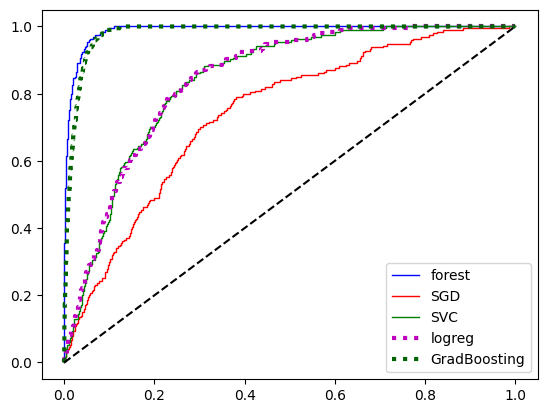

SVC: 0.8429861545575714
forest: 0.9893670266300357
SGD: 0.7424992519652912
logreg: 0.8437777112858037
GradBoosting: 0.9814657400103365


In [50]:
plt.plot(fpr_forest, tpr_forest, 'b',linewidth=1,label="forest")
plt.plot(fprSGD, tprSGD, 'r',linewidth=1,label="SGD")
plt.plot(fpr_SVC, tpr_SVC, 'g',linewidth=1,label="SVC")
plt.plot(fpr_logreg, tpr_logreg, 'm:',linewidth=3,label="logreg")
plt.plot(fpr_GB, tpr_GB, color='darkgreen',linestyle=':',linewidth=3,label="GradBoosting")

plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.show()
print(f'SVC: {roc_auc_score(y_train, y_scores_SVC)}')
print(f'forest: {roc_auc_score(y_train, y_scores_forest)}')
print(f'SGD: {roc_auc_score(y_train, y_scoresSGD)}')
print(f'logreg: {roc_auc_score(y_train, y_scores_logreg)}')
print(f'GradBoosting: {roc_auc_score(y_train, y_scores_GB)}')

## AdaBoost Classifier

In [51]:
adaboost_model = AdaBoostClassifier(random_state = 42)

In [52]:

param_grid = {
    'n_estimators': [40, 35,30],        # Number of boosting stages
    'learning_rate': [0.1],   # Learning rate
}

grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, scoring=f1_scorer, n_jobs=-1)
grid_search.fit(X_train, y_train,sample_weight =balanced_sample_weights)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_ada_model = grid_search.best_estimator_

cv_results = grid_search.cv_results_
print("All Scores for Tried Combinations:")
for mean_score, params in zip(cv_results['mean_test_score'], cv_results['params']):
    print(f"Parameters: {params}, Mean F1 Score: {mean_score}")

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 35}
All Scores for Tried Combinations:
Parameters: {'learning_rate': 0.1, 'n_estimators': 40}, Mean F1 Score: 0.21654101401325643
Parameters: {'learning_rate': 0.1, 'n_estimators': 35}, Mean F1 Score: 0.21881699610947777
Parameters: {'learning_rate': 0.1, 'n_estimators': 30}, Mean F1 Score: 0.21455303526519906


In [53]:
y_pred_ada = best_ada_model.predict(X_train)
y_scores_ada = best_ada_model.predict_proba(X_train)[:, 1]
precisions_ada, recalls_ada, thresholds_ada = precision_recall_curve(y_train,y_scores_ada)
fpr_ada, tpr_ada, __ = roc_curve(y_train, y_scores_ada)

In [54]:
score(y_train,y_pred_ada,y_scores_ada)

Accuracy: 0.7035642570281124
Precision: 0.12585291887793784
Recall: 0.8556701030927835
F1-score: 0.21943159286186387
Balanced Accuracy: 0.7757242336044392
AUC-ROC: 0.8497857900606588
AUC-PR: 0.18239953900004202
MCC: 0.25220541064681384
Confusion Matrix:
[[2637 1153]
 [  28  166]]

Classification Report:
              precision    recall  f1-score   support

           0      0.989     0.696     0.817      3790
           1      0.126     0.856     0.219       194

    accuracy                          0.704      3984
   macro avg      0.558     0.776     0.518      3984
weighted avg      0.947     0.704     0.788      3984



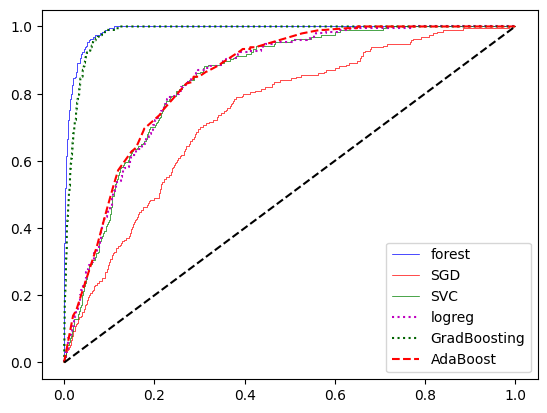

SVC: 0.8429861545575714
forest: 0.9893670266300357
SGD: 0.7424992519652912
logreg: 0.8437777112858037
GradBoosting: 0.9814657400103365
AdaBoost: 0.8497857900606588


In [55]:
plt.plot(fpr_forest, tpr_forest, 'b',linewidth=0.5,label="forest")
plt.plot(fprSGD, tprSGD, 'r',linewidth=0.5,label="SGD")
plt.plot(fpr_SVC, tpr_SVC, 'g',linewidth=0.5,label="SVC")
plt.plot(fpr_logreg, tpr_logreg, 'm:',linewidth=1.5,label="logreg")
plt.plot(fpr_GB, tpr_GB, color='darkgreen',linestyle=':',linewidth=1.5,label="GradBoosting")
plt.plot(fpr_ada, tpr_ada, 'r--',linewidth=1.5,label="AdaBoost")

plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.show()
print(f'SVC: {roc_auc_score(y_train, y_scores_SVC)}')
print(f'forest: {roc_auc_score(y_train, y_scores_forest)}')
print(f'SGD: {roc_auc_score(y_train, y_scoresSGD)}')
print(f'logreg: {roc_auc_score(y_train, y_scores_logreg)}')
print(f'GradBoosting: {roc_auc_score(y_train, y_scores_GB)}')
print(f'AdaBoost: {roc_auc_score(y_train, y_scores_ada)}')

## RadiusNeighbors Classifier

### warning: RadiusNeighborsClassifier is not commonly used for classification tasks, especially with imbalanced data

In [56]:
rnc = RadiusNeighborsClassifier()

# Define the hyperparameter grid to search over
param_grid = {
    'radius': [0.1, 0.05, 0.01],  # Radius parameter for radius-based neighbors search
    'outlier_label': [0, 1]     # Label for outliers (samples not covered by any neighbor)
}

# Define the custom scoring function for F1 score
f1_scorer = make_scorer(f1_score)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rnc, param_grid=param_grid, cv=5, scoring=f1_scorer,n_jobs = -1,refit = True)
grid_search.fit(X_train, y_train)

# Get the best parameters found during the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model with the optimal parameters
best_rnc_model = grid_search.best_estimator_

Best Parameters: {'outlier_label': 1, 'radius': 0.1}


In [57]:
y_pred_rnc = best_rnc_model.predict(X_train)
y_scores_rnc = best_rnc_model.predict_proba(X_train)[:, 1]
precisions_rnc, recalls_rnc, thresholds_rnc = precision_recall_curve(y_train,y_scores_rnc)
fpr_rnc, tpr_rnc, __ = roc_curve(y_train, y_scores_rnc)

In [58]:
score(y_train,y_pred_rnc,y_scores_rnc)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Balanced Accuracy: 1.0
AUC-ROC: 1.0
AUC-PR: 1.0
MCC: 1.0
Confusion Matrix:
[[3790    0]
 [   0  194]]

Classification Report:
              precision    recall  f1-score   support

           0      1.000     1.000     1.000      3790
           1      1.000     1.000     1.000       194

    accuracy                          1.000      3984
   macro avg      1.000     1.000     1.000      3984
weighted avg      1.000     1.000     1.000      3984



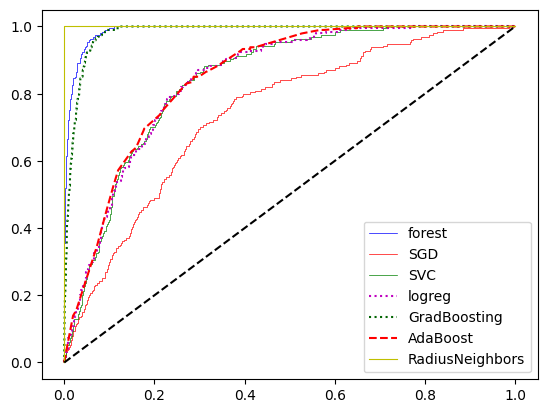

SVC: 0.8429861545575714
forest: 0.9893670266300357
SGD: 0.7424992519652912
logreg: 0.8437777112858037
GradBoosting: 0.9814657400103365
AdaBoost: 0.8497857900606588
RadiusNeighbors: 1.0


In [59]:
plt.plot(fpr_forest, tpr_forest, 'b',linewidth=0.5,label="forest")
plt.plot(fprSGD, tprSGD, 'r',linewidth=0.5,label="SGD")
plt.plot(fpr_SVC, tpr_SVC, 'g',linewidth=0.5,label="SVC")
plt.plot(fpr_logreg, tpr_logreg, 'm:',linewidth=1.5,label="logreg")
plt.plot(fpr_GB, tpr_GB, color='darkgreen',linestyle=':',linewidth=1.5,label="GradBoosting")
plt.plot(fpr_ada, tpr_ada, 'r--',linewidth=1.5,label="AdaBoost")
plt.plot(fpr_rnc, tpr_rnc, 'y',linewidth=0.8,label="RadiusNeighbors")


plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.show()
print(f'SVC: {roc_auc_score(y_train, y_scores_SVC)}')
print(f'forest: {roc_auc_score(y_train, y_scores_forest)}')
print(f'SGD: {roc_auc_score(y_train, y_scoresSGD)}')
print(f'logreg: {roc_auc_score(y_train, y_scores_logreg)}')
print(f'GradBoosting: {roc_auc_score(y_train, y_scores_GB)}')
print(f'AdaBoost: {roc_auc_score(y_train, y_scores_ada)}')
print(f'RadiusNeighbors: {roc_auc_score(y_train, y_scores_rnc)}')

this model is likely overfiting the data

# now we are going to combine all of them to make an ensamble

In [71]:
ensemble = VotingClassifier(estimators=[
    ('random_forest', best_forest_clf),
    ('logical_regresion', best_logreg_model),
    ('svc', best_svc_clf),
     ('gb', best_gb_model),
    ('ada', best_ada_model),
    ('rnc', best_rnc_model)
], voting='soft')  # Use 'soft' voting to predict class probabilities

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=10,
                                                     min_samples_leaf=2,
                                                     min_samples_split=10,
                                                     n_estimators=110,
                                                     random_state=42)),
                             ('logical_regresion',
                              LogisticRegression(C=2.5, class_weight='balanced',
                                                 max_iter=300, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('svc',
                              SVC(C=1, class_weight='balanced', kernel='linear',
                                  probability=True, random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.03,
                                                         max_depth=6)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.1,
                                                 n_estimators=35,
                                                 random_state=42)),
                             ('rnc',
                              RadiusNeighborsClassifier(outlier_label=1,
                                                        radius=0.1))],
                 voting='soft')

In [72]:
y_pred_ALL = ensemble.predict(X_train)
y_scores_ALL = ensemble.predict_proba(X_train)[:, 1]
precisions_ALL, recalls_ALL, thresholds_ALL = precision_recall_curve(y_train,y_scores_ALL)
fpr_ALL, tpr_ALL, __ = roc_curve(y_train, y_scores_ALL)

In [73]:
score(y_train,y_pred_ALL,y_scores_ALL)

Accuracy: 0.9864457831325302
Precision: 1.0
Recall: 0.7216494845360825
F1-score: 0.8383233532934131
Balanced Accuracy: 0.8608247422680413
AUC-ROC: 0.998467208878492
AUC-PR: 0.9803872814694369
MCC: 0.8435116174049566
Confusion Matrix:
[[3790    0]
 [  54  140]]

Classification Report:
              precision    recall  f1-score   support

           0      0.986     1.000     0.993      3790
           1      1.000     0.722     0.838       194

    accuracy                          0.986      3984
   macro avg      0.993     0.861     0.916      3984
weighted avg      0.987     0.986     0.985      3984



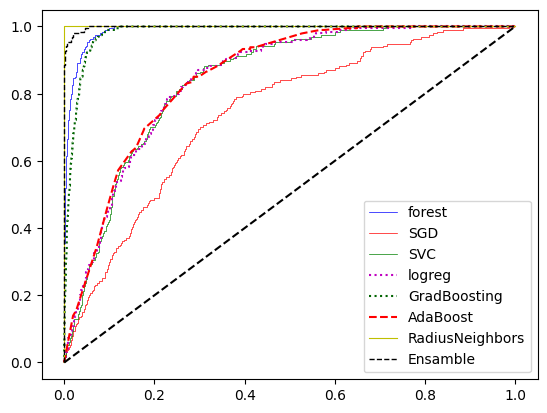

SVC: 0.8429861545575714
forest: 0.9893670266300357
SGD: 0.7424992519652912
logreg: 0.8437777112858037
GradBoosting: 0.9814657400103365
AdaBoost: 0.8497857900606588
RadiusNeighbors: 1.0
Ensamble: 0.998467208878492


In [74]:
plt.plot(fpr_forest, tpr_forest, 'b',linewidth=0.5,label="forest")
plt.plot(fprSGD, tprSGD, 'r',linewidth=0.5,label="SGD")
plt.plot(fpr_SVC, tpr_SVC, 'g',linewidth=0.5,label="SVC")
plt.plot(fpr_logreg, tpr_logreg, 'm:',linewidth=1.5,label="logreg")
plt.plot(fpr_GB, tpr_GB, color='darkgreen',linestyle=':',linewidth=1.5,label="GradBoosting")
plt.plot(fpr_ada, tpr_ada, 'r--',linewidth=1.5,label="AdaBoost")
plt.plot(fpr_rnc, tpr_rnc, 'y',linewidth=0.8,label="RadiusNeighbors")
plt.plot(fpr_ALL, tpr_ALL, 'k--',linewidth=1,label="Ensamble")


plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.show()
print(f'SVC: {roc_auc_score(y_train, y_scores_SVC)}')
print(f'forest: {roc_auc_score(y_train, y_scores_forest)}')
print(f'SGD: {roc_auc_score(y_train, y_scoresSGD)}')
print(f'logreg: {roc_auc_score(y_train, y_scores_logreg)}')
print(f'GradBoosting: {roc_auc_score(y_train, y_scores_GB)}')
print(f'AdaBoost: {roc_auc_score(y_train, y_scores_ada)}')
print(f'RadiusNeighbors: {roc_auc_score(y_train, y_scores_rnc)}')
print(f'Ensamble: {roc_auc_score(y_train, y_scores_ALL)}')

### making ensamble with the best 2 models

In [110]:
ensemble = VotingClassifier(estimators=[
    ('random_forest', best_forest_clf),
    ('logical_regresion', best_logreg_model),
    ('svc', best_svc_clf),
     ('gb', best_gb_model),
    ('ada', best_ada_model),
], voting='soft',n_jobs=-1)  # Use 'soft' voting to predict class probabilities

# Fit the ensemble model on the training data
ensemble.fit(X_train, y_train,sample_weight =balanced_sample_weights)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=10,
                                                     min_samples_leaf=2,
                                                     min_samples_split=10,
                                                     n_estimators=110,
                                                     random_state=42)),
                             ('logical_regresion',
                              LogisticRegression(C=2.5, class_weight='balanced',
                                                 max_iter=300, penalty='l1',
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('svc',
                              SVC(C=1, class_weight='balanced', kernel='linear',
                                  probability=True, random_state=42)),
                             ('gb',
                              GradientBoostingClassifier(learning_rate=0.03,
                                                         max_depth=6)),
                             ('ada',
                              AdaBoostClassifier(learning_rate=0.1,
                                                 n_estimators=35,
                                                 random_state=42))],
                 n_jobs=-1, voting='soft')

In [111]:
y_pred_ensamble2 = ensemble2.predict(X_train)
y_scores_ensamble2 = ensemble2.predict_proba(X_train)[:, 1]
precisions_ensamle2, recalls_ensamle2, thresholds_ensamle2 = precision_recall_curve(y_train,y_scores_ensamble2)
fpr_ensamle2, tpr_ensamble2, __ = roc_curve(y_train, y_scores_ensamble2)

In [112]:
score(y_train,y_pred_ensamble2,y_scores_ensamble2)

Accuracy: 0.982429718875502
Precision: 0.9769230769230769
Recall: 0.654639175257732
F1-score: 0.7839506172839505
Balanced Accuracy: 0.82692380926475
AUC-ROC: 0.9933778527323668
AUC-PR: 0.9249745573394083
MCC: 0.7920807977508998
Confusion Matrix:
[[3787    3]
 [  67  127]]

Classification Report:
              precision    recall  f1-score   support

           0      0.983     0.999     0.991      3790
           1      0.977     0.655     0.784       194

    accuracy                          0.982      3984
   macro avg      0.980     0.827     0.887      3984
weighted avg      0.982     0.982     0.981      3984



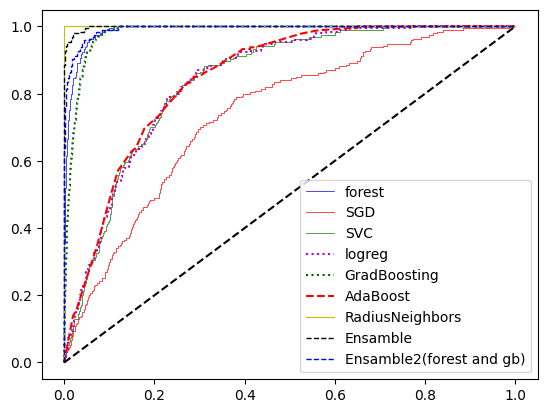

SVC: 0.8429861545575714
forest: 0.9893670266300357
SGD: 0.7424992519652912
logreg: 0.8437777112858037
GradBoosting: 0.9814657400103365
AdaBoost: 0.8497857900606588
RadiusNeighbors: 1.0
Ensamble: 0.998467208878492
Ensamble: 0.9933778527323668


In [88]:
plt.plot(fpr_forest, tpr_forest, 'b',linewidth=0.5,label="forest")
plt.plot(fprSGD, tprSGD, 'r',linewidth=0.5,label="SGD")
plt.plot(fpr_SVC, tpr_SVC, 'g',linewidth=0.5,label="SVC")
plt.plot(fpr_logreg, tpr_logreg, 'm:',linewidth=1.5,label="logreg")
plt.plot(fpr_GB, tpr_GB, color='darkgreen',linestyle=':',linewidth=1.5,label="GradBoosting")
plt.plot(fpr_ada, tpr_ada, 'r--',linewidth=1.5,label="AdaBoost")
plt.plot(fpr_rnc, tpr_rnc, 'y',linewidth=0.8,label="RadiusNeighbors")
plt.plot(fpr_ALL, tpr_ALL, 'k--',linewidth=1,label="Ensamble")
plt.plot(fpr_ensamle2, tpr_ensamble2, 'b--',linewidth=1,label="Ensamble2")


plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.show()
print(f'SVC: {roc_auc_score(y_train, y_scores_SVC)}')
print(f'forest: {roc_auc_score(y_train, y_scores_forest)}')
print(f'SGD: {roc_auc_score(y_train, y_scoresSGD)}')
print(f'logreg: {roc_auc_score(y_train, y_scores_logreg)}')
print(f'GradBoosting: {roc_auc_score(y_train, y_scores_GB)}')
print(f'AdaBoost: {roc_auc_score(y_train, y_scores_ada)}')
print(f'RadiusNeighbors: {roc_auc_score(y_train, y_scores_rnc)}')
print(f'Ensamble: {roc_auc_score(y_train, y_scores_ALL)}')
print(f'Ensamble: {roc_auc_score(y_train, y_scores_ensamble2)}')

# testing the models on the test data

In [89]:
y_pred_logreg_test = best_logreg_model.predict(X_test)
y_scores_logreg_test = best_logreg_model.predict_proba(X_test)[:, 1]
precisions_logreg_test, recalls_logreg_test, thresholds_logreg_test = precision_recall_curve(y_test,y_scores_logreg_test)
fpr_logreg_test, tpr_logreg_test, __ = roc_curve(y_test, y_scores_logreg_test)

y_pred_GB_test = best_gb_model.predict(X_test)
y_scores_GB_test = best_gb_model.predict_proba(X_test)[:, 1]
precisions_GB_test, recalls_GB_test, thresholds_GB_test = precision_recall_curve(y_test,y_scores_GB_test)
fpr_GB_test, tpr_GB_test, __ = roc_curve(y_test, y_scores_GB_test)

y_pred_SVC_test = best_svc_clf.predict(X_test)
y_scores_SVC_test = best_svc_clf.predict_proba(X_test)[:, 1]
precisions_SVC_test, recalls_SVC_test, thresholds_SVC_test = precision_recall_curve(y_test,y_scores_SVC_test)
fpr_SVC_test, tpr_SVC_test, __ = roc_curve(y_test, y_scores_SVC_test)

y_pred_forest_test = best_forest_clf.predict(X_test)
y_scores_forest_test = best_forest_clf.predict_proba(X_test)[:, 1]
precisions_forest_test, recalls_forest_test, thresholds_forest_test = precision_recall_curve(y_test,y_scores_forest_test)
fpr_forest_test, tpr_forest_test, __ = roc_curve(y_test, y_scores_forest_test)

y_predSGD_test = best_sgd_clf.predict(X_test)
y_scoresSGD_test = cross_val_predict(best_sgd_clf, X_test, y_test, cv=3,method="decision_function")
precisionsSGD_test, recallsSGD_test, thresholdsSGD_test = precision_recall_curve(y_test,y_scoresSGD_test)
fprSGD_test, tprSGD_test, _ = roc_curve(y_test, y_scoresSGD_test)

y_pred_ada_test = best_ada_model.predict(X_test)
y_scores_ada_test = best_ada_model.predict_proba(X_test)[:, 1]
precisions_ada_test, recalls_ada_test, thresholds_ada_test = precision_recall_curve(y_test,y_scores_ada_test)
fpr_ada_test, tpr_ada_test, __ = roc_curve(y_test, y_scores_ada_test)

y_pred_rnc_test = best_rnc_model.predict(X_test)
y_scores_rnc_test = best_rnc_model.predict_proba(X_test)[:, 1]
precisions_rnc_test, recalls_rnc_test, thresholds_rnc_test = precision_recall_curve(y_test,y_scores_rnc_test)
fpr_rnc_test, tpr_rnc_test, __ = roc_curve(y_test, y_scores_rnc_test)

y_pred_ALL_test = ensemble.predict(X_test)
y_scores_ALL_test = ensemble.predict_proba(X_test)[:, 1]
precisions_ALL_test, recalls_ALL_test, thresholds_ALL_test = precision_recall_curve(y_test,y_scores_ALL_test)
fpr_ALL_test, tpr_ALL_test, __ = roc_curve(y_test, y_scores_ALL_test)

y_pred_ensamble2_test = ensemble2.predict(X_test)
y_scores_ensamble2_test = ensemble2.predict_proba(X_test)[:, 1]
precisions_ensamble2_test, recalls_ensamble2_test, thresholds_ensamble2_test = precision_recall_curve(y_test,y_scores_ensamble2_test)
fpr_ensamble2_test, tpr_ensamble2_test, __ = roc_curve(y_test, y_scores_ensamble2_test)

In [91]:
print("******_____*****\n")
score(y_test,y_pred_logreg_test,y_scores_logreg_test)
print("******_____*****\n")
score(y_test,y_pred_GB_test,y_scores_GB_test)
print("******_____*****\n")
score(y_test,y_pred_SVC_test,y_scores_SVC_test)
print("******_____*****\n")
score(y_test,y_pred_forest_test,y_scores_forest_test)
print("******_____*****\n")
score(y_test,y_predSGD_test,y_scoresSGD_test)
print("******_____*****\n")
score(y_test,y_pred_ada_test,y_scores_ada_test)
print("******_____*****\n")
score(y_test,y_pred_rnc_test,y_scores_rnc_test)
print("******_____*****\n")
score(y_test,y_pred_ALL_test,y_scores_ALL_test)
print("******_____*****\n")
score(y_test,y_pred_ensamble2_test,y_scores_ensamble2_test)

******_____*****

Accuracy: 0.7352056168505516
Precision: 0.15
Recall: 0.8333333333333334
F1-score: 0.2542372881355932
Balanced Accuracy: 0.7814598798161895
AUC-ROC: 0.8520285927496956
AUC-PR: 0.27887931281670936
MCC: 0.27779357919867104
Confusion Matrix:
[[688 255]
 [  9  45]]

Classification Report:
              precision    recall  f1-score   support

           0      0.987     0.730     0.839       943
           1      0.150     0.833     0.254        54

    accuracy                          0.735       997
   macro avg      0.569     0.781     0.547       997
weighted avg      0.942     0.735     0.807       997

******_____*****

Accuracy: 0.8375125376128385
Precision: 0.19318181818181818
Recall: 0.6296296296296297
F1-score: 0.29565217391304344
Balanced Accuracy: 0.7395231923333726
AUC-ROC: 0.833510074231177
AUC-PR: 0.18321173992417475
MCC: 0.2843821810815156
Confusion Matrix:
[[801 142]
 [ 20  34]]

Classification Report:
              precision    recall  f1-score   support

C:\Users\Dimitar Trajkov\Desktop\ml\my_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimitar Trajkov\Desktop\ml\my_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimitar Trajkov\Desktop\ml\my_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


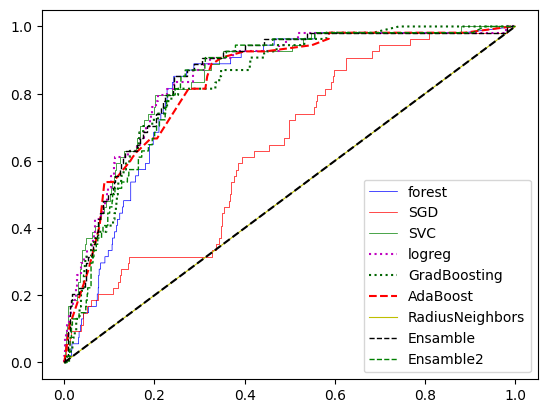

SVC: 0.851066336750324
forest: 0.8226012332587094
SGD: 0.6396645850516476
logreg: 0.8520285927496956
GradBoosting: 0.833510074231177
AdaBoost: 0.8347472605160834
RadiusNeighbors: 0.5
Ensamble: 0.8506146655669455
Ensamble2: 0.8375849338203527


In [95]:
plt.plot(fpr_forest_test, tpr_forest_test, 'b',linewidth=0.5,label="forest")
plt.plot(fprSGD_test, tprSGD_test, 'r',linewidth=0.5,label="SGD")
plt.plot(fpr_SVC_test, tpr_SVC_test, 'g',linewidth=0.5,label="SVC")
plt.plot(fpr_logreg_test, tpr_logreg_test, 'm:',linewidth=1.5,label="logreg")
plt.plot(fpr_GB_test, tpr_GB_test, color='darkgreen',linestyle=':',linewidth=1.5,label="GradBoosting")
plt.plot(fpr_ada_test, tpr_ada_test, 'r--',linewidth=1.5,label="AdaBoost")
plt.plot(fpr_rnc_test, tpr_rnc_test, 'y',linewidth=0.8,label="RadiusNeighbors")
plt.plot(fpr_ALL_test, tpr_ALL_test, 'k--',linewidth=1,label="Ensamble")
plt.plot(fpr_ensamble2_test, tpr_ensamble2_test, 'g--',linewidth=1,label="Ensamble2")


plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.show()
print(f'SVC: {roc_auc_score(y_test, y_scores_SVC_test)}')
print(f'forest: {roc_auc_score(y_test, y_scores_forest_test)}')
print(f'SGD: {roc_auc_score(y_test, y_scoresSGD_test)}')
print(f'logreg: {roc_auc_score(y_test, y_scores_logreg_test)}')
print(f'GradBoosting: {roc_auc_score(y_test, y_scores_GB_test)}')
print(f'AdaBoost: {roc_auc_score(y_test, y_scores_ada_test)}')
print(f'RadiusNeighbors: {roc_auc_score(y_test, y_scores_rnc_test)}')
print(f'Ensamble: {roc_auc_score(y_test, y_scores_ALL_test)}')
print(f'Ensamble2: {roc_auc_score(y_test, y_scores_ensamble2_test)}')

In [97]:
print(f'SVC: {f1_score(y_test, y_pred_SVC_test)}')
print(f'forest: {f1_score(y_test, y_pred_forest_test)}')
print(f'SGD: {f1_score(y_test, y_predSGD_test)}')
print(f'logreg: {f1_score(y_test, y_pred_logreg_test)}')
print(f'GradBoosting: {f1_score(y_test, y_pred_GB_test)}')
print(f'AdaBoost: {f1_score(y_test, y_pred_ada_test)}')
print(f'RadiusNeighbors: {f1_score(y_test, y_pred_rnc_test)}')
print(f'Ensamble: {f1_score(y_test, y_pred_ALL_test)}')
print(f'Ensamble2: {f1_score(y_test, y_pred_ensamble2_test)}')

SVC: 0.24
forest: 0.15126050420168066
SGD: 0.26282051282051283
logreg: 0.2542372881355932
GradBoosting: 0.29565217391304344
AdaBoost: 0.2305764411027569
RadiusNeighbors: 0.1027592768791627
Ensamble: 0.03225806451612903
Ensamble2: 0.030769230769230767


# Conclusion: Almost every model has the same performance on the test data.

## KNeighborsClassifier 

In [103]:
knn_clf = KNeighborsClassifier()


In [118]:

recall_scorer = make_scorer(recall_score)
param_grid = {
    'n_neighbors': [3, 5, 7],         # Number of neighbors
    'weights': ['uniform', 'distance'],    # Weight function used in prediction
    'p': [1, 2],                     # Power parameter for the Minkowski metric
}

grid_search = GridSearchCV(estimator=knn_clf, param_grid=param_grid, cv=5, scoring=recall_scorer, refit=True, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_knn_clf = grid_search.best_estimator_


Best Parameters: {'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


In [119]:
y_pred_knn = best_knn_clf.predict(X_train)
y_scores_knn = best_knn_clf.predict_proba(X_train)[:, 1]
precisions_knn, recalls_knn, thresholds_knn = precision_recall_curve(y_train,y_scores_knn)
fpr_knn, tpr_knn, __ = roc_curve(y_train, y_scores_knn)

In [120]:
score(y_train,y_pred_knn,y_scores_knn)

Accuracy: 0.9573293172690763
Precision: 0.6578947368421053
Recall: 0.25773195876288657
F1-score: 0.37037037037037035
Balanced Accuracy: 0.6254359002257704
AUC-ROC: 0.9653224709626527
AUC-PR: 0.4585332871671336
MCC: 0.39471919182865456
Confusion Matrix:
[[3764   26]
 [ 144   50]]

Classification Report:
              precision    recall  f1-score   support

           0      0.963     0.993     0.978      3790
           1      0.658     0.258     0.370       194

    accuracy                          0.957      3984
   macro avg      0.811     0.625     0.674      3984
weighted avg      0.948     0.957     0.948      3984



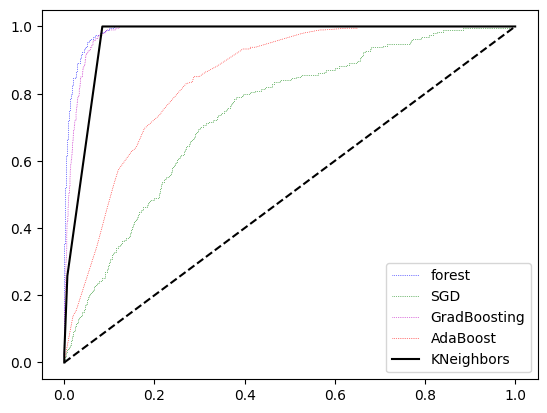

forest: 0.9893670266300357
SGD: 0.7424992519652912
GradBoosting: 0.9814657400103365
AdaBoost: 0.8497857900606588
KNeighbors: 0.9653224709626527


In [124]:
plt.plot(fpr_forest, tpr_forest, 'b:',linewidth=0.5,label="forest")
plt.plot(fprSGD, tprSGD, 'g:',linewidth=0.5,label="SGD")
plt.plot(fpr_GB, tpr_GB, 'm:',linewidth=0.5,label="GradBoosting")
plt.plot(fpr_ada, tpr_ada, 'r:',linewidth=0.5,label="AdaBoost")
plt.plot(fpr_knn, tpr_knn, 'k',linewidth=1.5,label="KNeighbors")


plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.show()
print(f'forest: {roc_auc_score(y_train, y_scores_forest)}')
print(f'SGD: {roc_auc_score(y_train, y_scoresSGD)}')
print(f'GradBoosting: {roc_auc_score(y_train, y_scores_GB)}')
print(f'AdaBoost: {roc_auc_score(y_train, y_scores_ada)}')
print(f'KNeighbors: {roc_auc_score(y_train, y_scores_knn)}')

This model has veryy bad recall score so we will probably abandon it

## MLPClassifier

In [129]:
mlp_clf = MLPClassifier(random_state=42)

In [131]:
param_grid = {
    'hidden_layer_sizes': [(100,), (50, 50), (50, 100, 50)], # Different hidden layer sizes
    'activation': ['relu', 'tanh', 'logistic'],              # Activation functions
    'alpha': [0.0001, 0.001, 0.01],                         # Regularization parameter
}
grid_search = GridSearchCV(estimator=mlp_clf, param_grid=param_grid, cv=5, scoring=f1_scorer, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters found during the grid search
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_mlp_clf = grid_search.best_estimator_


Best Parameters: {'activation': 'tanh', 'alpha': 0.001, 'hidden_layer_sizes': (50, 100, 50)}


In [133]:
y_pred_mlp = best_mlp_clf.predict(X_train)
y_scores_mlp = best_mlp_clf.predict_proba(X_train)[:, 1]
precisions_mlp, recalls_mlp, thresholds_mlp = precision_recall_curve(y_train,y_scores_mlp)
fpr_mlp, tpr_mlp, __ = roc_curve(y_train, y_scores_mlp)

In [134]:
score(y_train,y_pred_mlp,y_scores_mlp)

Accuracy: 0.9513052208835341
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Balanced Accuracy: 0.5
AUC-ROC: 0.8562562902918696
AUC-PR: 0.24662373436309332
MCC: 0.0
Confusion Matrix:
[[3790    0]
 [ 194    0]]

Classification Report:
              precision    recall  f1-score   support

           0      0.951     1.000     0.975      3790
           1      0.000     0.000     0.000       194

    accuracy                          0.951      3984
   macro avg      0.476     0.500     0.488      3984
weighted avg      0.905     0.951     0.928      3984



C:\Users\Dimitar Trajkov\Desktop\ml\my_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimitar Trajkov\Desktop\ml\my_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimitar Trajkov\Desktop\ml\my_env\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Dimitar Trajk

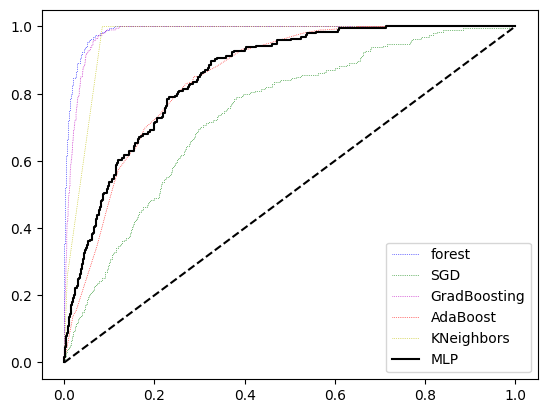

forest: 0.9893670266300357
SGD: 0.7424992519652912
GradBoosting: 0.9814657400103365
AdaBoost: 0.8497857900606588
KNeighbors: 0.9653224709626527
MLP: 0.8562562902918696


In [137]:
plt.plot(fpr_forest, tpr_forest, 'b:',linewidth=0.5,label="forest")
plt.plot(fprSGD, tprSGD, 'g:',linewidth=0.5,label="SGD")
plt.plot(fpr_GB, tpr_GB, 'm:',linewidth=0.5,label="GradBoosting")
plt.plot(fpr_ada, tpr_ada, 'r:',linewidth=0.5,label="AdaBoost")
plt.plot(fpr_knn, tpr_knn, 'y:',linewidth=0.5,label="KNeighbors")
plt.plot(fpr_mlp, tpr_mlp, 'k',linewidth=1.5,label="MLP")


plt.plot([0, 1], [0, 1], 'k--')
plt.legend(loc="lower right")
plt.show()
print(f'forest: {roc_auc_score(y_train, y_scores_forest)}')
print(f'SGD: {roc_auc_score(y_train, y_scoresSGD)}')
print(f'GradBoosting: {roc_auc_score(y_train, y_scores_GB)}')
print(f'AdaBoost: {roc_auc_score(y_train, y_scores_ada)}')
print(f'KNeighbors: {roc_auc_score(y_train, y_scores_knn)}')
print(f'MLP: {roc_auc_score(y_train, y_scores_mlp)}')

this model is basily predicting false 100% of the cases